# The Hanging Chain: Part 2

For mathematical details, see https://scipython.com/blog/the-hanging-chain-part-2/

Change the definition of the function `f(u)` to change the initial conditions of the chain.

In [1]:
import numpy as np
from scipy.special import j0, j1, jn_zeros
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
# Acceleration due to gravity, m.s-2
g = 9.81
# Chain length, m
L = 1
# Vertical axis (m)
N = 201
z = np.linspace(0, L, N)
# Scaled vertical axis
u = 2 * np.sqrt(z/g)

In [3]:
# The initial state of the chain, x(z,0): linear from (0,d) to (c,0) then zero
# from (c,0) to (L,0).
d, c = 0.05, L/4
p, q = -d/c, d
def f(u):
    z = u**2 * g / 4
    if np.isscalar(z):
        if z > c:
            return 0
        return p*z + q
    h = p*z + q
    h[z>c] = 0
    return h

nmax = 10
# jn_zeros calculates the first n zeros of the zero-th order Bessel function of the first kind
w = jn_zeros(0, nmax)
b = 2 * np.sqrt(L/g)
def func(u, n):
    return u * f(u) * j0(w[n-1] / b * u)
A = []
for n in range(1, nmax+1):
    An = quad(func, 0, b, args=(n,))[0] * 2 / (b * j1(w[n-1]))**2
    A.append(An)

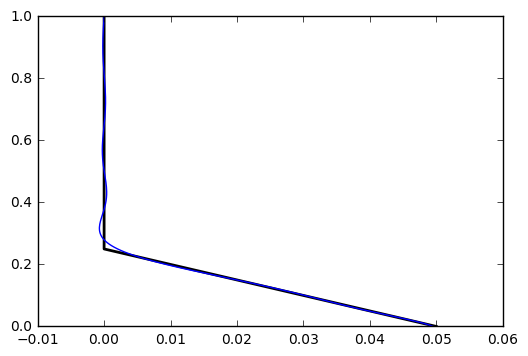

In [4]:
# To plot the initial condition of the chain, run this cell.
plt.plot(f(u), z, 'k', lw=2)
xfit = np.zeros(N)
for n in range(nmax):
    xfit += A[n-1] * j0(w[n-1] / b * u)
plt.plot(xfit,z)
plt.show()

In [5]:
# Set up the Figure and Axes
fig, ax = plt.subplots(figsize=(4,6))

ax.axis('off')
ax.set_xlim((-2*d, 2*d))
ax.set_ylim((0, L))

line, = ax.plot([], [], 'k', dashes=[5,2], lw=3)

In [6]:
# Initialization function for the animation
def init():
    line.set_data([], [])
    return (line,)

In [7]:
# Delay between frames (ms)
interval = 1000/24
# Total length of animation (s)
anim_duration = 5
# Total number of frames in the animation
nframes = int(anim_duration * 1000 / interval)

# The animation function, to be called sequentially
def animate(i):
    t = i * interval / 1000
    x = np.zeros(N)
    for n in range(0, nmax):
        x += A[n-1] * j0(w[n-1] / b * u) * np.cos(w[n-1] * t)
    line.set_data(x, z)
    return (line,)

In [8]:
# Set up the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=interval, blit=True)

In [9]:
# To save the animation as a gif, run this cell.
anim.save('chain.gif', writer='imagemagick', fps=1000/interval)

In [10]:
# To show the animation in a Jupyter Notebook cell, run this cell.
HTML(anim.to_html5_video())